In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import cufflinks as cf
import seaborn as sns

In [2]:
cf.go_offline()

In [3]:
# Import DataSet

df = pd.read_csv('../data/diamonds_train.csv')
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95
...,...,...,...,...,...,...,...,...,...,...
40450,1.34,Ideal,G,VS1,62.7,57.0,10070,7.10,7.04,4.43
40451,2.02,Good,F,SI2,57.1,60.0,12615,8.31,8.25,4.73
40452,1.01,Ideal,H,SI1,62.7,56.0,5457,6.37,6.42,4.01
40453,0.33,Ideal,J,VS1,61.9,54.3,456,4.45,4.47,2.76


# Challenge 1: Exploratory Data Visualization Charts and Summary Statistics

In [4]:
# To check the types, use dtypes

df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [5]:
# To check main statisticals parameters of numerical Columns, use describe function.

df.describe()

,carat,depth,table,price,x,y,z
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,0.797706,61.752841,57.446133,3928.444469,5.729392,5.732819,3.537154
std,0.475544,1.431725,2.233535,3992.416147,1.124453,1.146650,0.697062
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,945.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2397.000000,5.690000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5331.000000,6.540000,6.540000,4.035000
max,4.500000,79.000000,95.000000,18823.000000,10.230000,58.900000,8.060000


In [6]:
# Also check if there are null values (it seems there aren't).

df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [7]:
# Now we check the unique values of categorical Columns (cut, color and clarity).

print(f'Cut:{df.cut.unique()}\nColor:{df.color.unique()}\nClarity:{df.clarity.unique()}')

Cut:['Premium' 'Very Good' 'Fair' 'Good' 'Ideal']
Color:['J' 'H' 'G' 'D' 'F' 'E' 'I']
Clarity:['VS2' 'VS1' 'SI1' 'SI2' 'IF' 'VVS1' 'VVS2' 'I1']


### Correlation (HeatMap)

<AxesSubplot:>

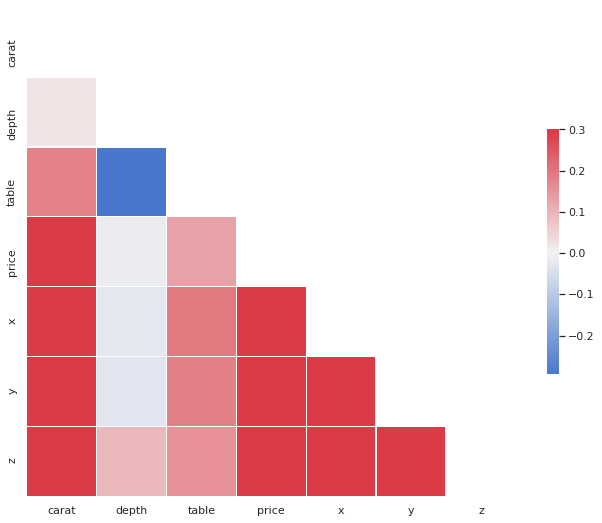

In [8]:
# A Heat Map is a useful tool to check which is the correlation between numeric columns in a dataset.

sns.set_theme(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(255, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Based on graph above:
 - Price is highly correlated to 'carat'
 - Dimesions are also higlhy correlated to price.
 - Depth is inversely correlated to price.

We can visualize these relations between the diamond price and other features, such as **carat** (FYI, diamond carat weight measures how much a diamond weighs; a metric “carat” is defined as 200 milligrams and each carat is subdivided into 100 ‘points.’) or **depth percentage**.

## 1) Carat

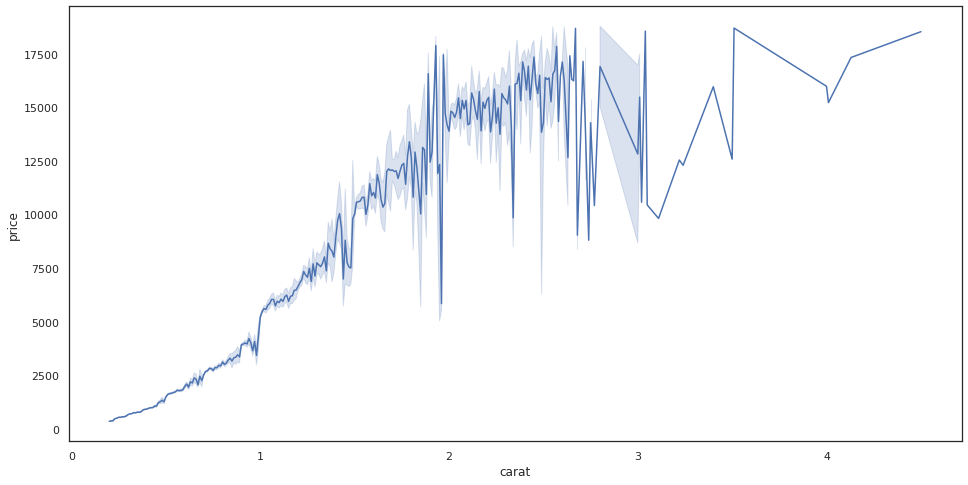

In [9]:
fig = plt.figure(figsize=(16, 8))
ax = sns.lineplot(x='carat', y='price', data=df)

It can be seen that carat weight have a notable influence on diamonds prices. 

## 2) Depth

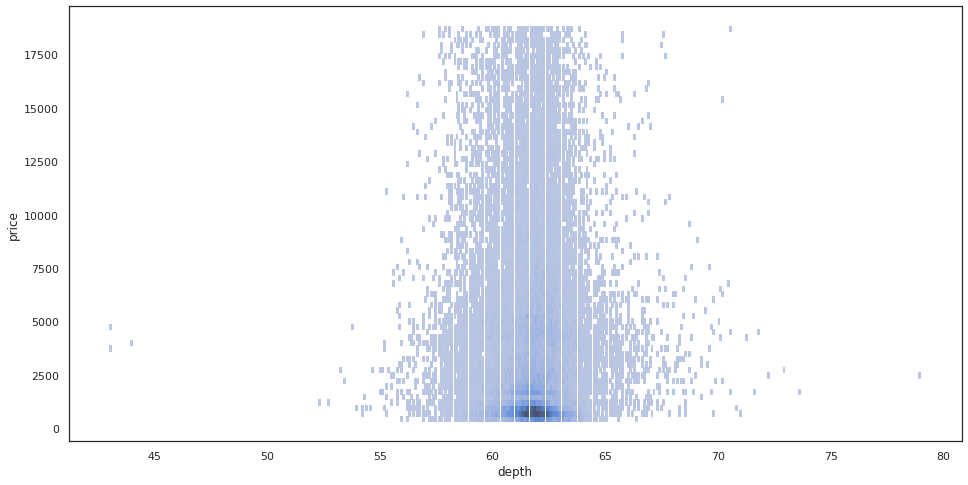

In [10]:
fig = plt.figure(figsize=(16, 8))
ax = sns.histplot(data=df, x='depth', y='price')

On the other hand,a higher diamond's depth percentage doesn't mean a higher price. Graphic above show that 'perfect' depth would be between 60 and 65%. If a cut is too shallow, light will simply pass through the stone and leave through the pavilion (the lower half) without any reflection. On the other hand, a cut that is too deep will have poor sparkle and make the stone appear smaller than other stones of the same carat weight.

Now let's see if the color has any influence on the price also...

## 3) Color


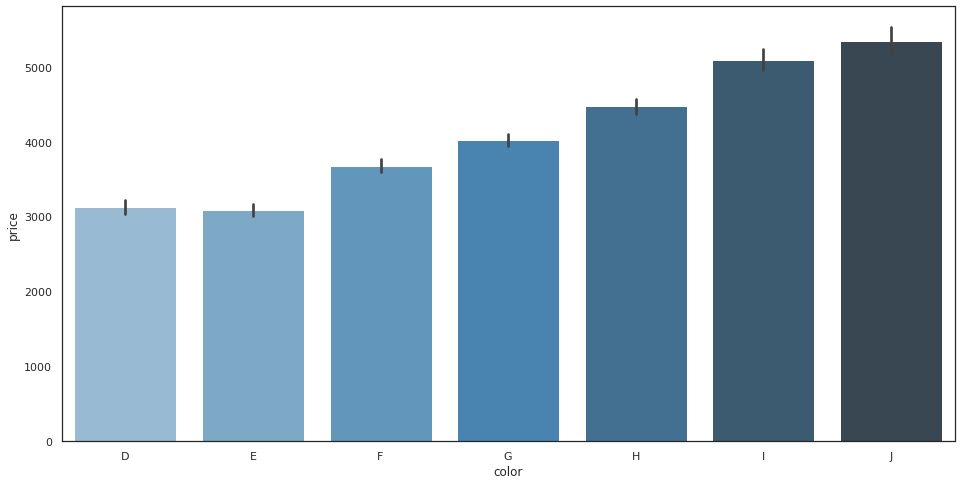

In [11]:
fig = plt.figure(figsize=(16, 8))
ax = sns.barplot(x='color', y='price', data=df, palette= 'Blues_d', order= ['D', 'E', 'F', 'G', 'H', 'I', 'J'])

Diamonds come in a variety of colors, some of them highly prized (pinks, blues, even yellow). However in a white diamond, the presence of a yellow tint will lower the price of a diamond. The less body color in a white diamond (from D to J), the more true color it will reflect, and thus the greater its value.

Therefore, it comes not to be true (at least only comparing color vs price) that **colorless diamonds are more expensive...**

Let's check other features versus the price of the diamond, such as cut and clarity.

## 4) Cut

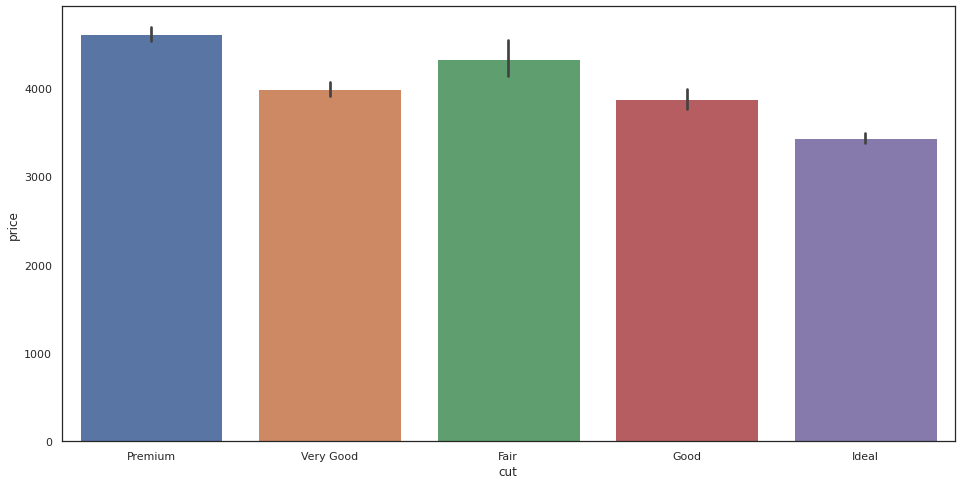

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))

ax = sns.barplot(x='cut', y='price', data=df)

At a first glance, it is logic to think that most expensive diamonds would be the 'Premium' ones.

## 5) Clarity

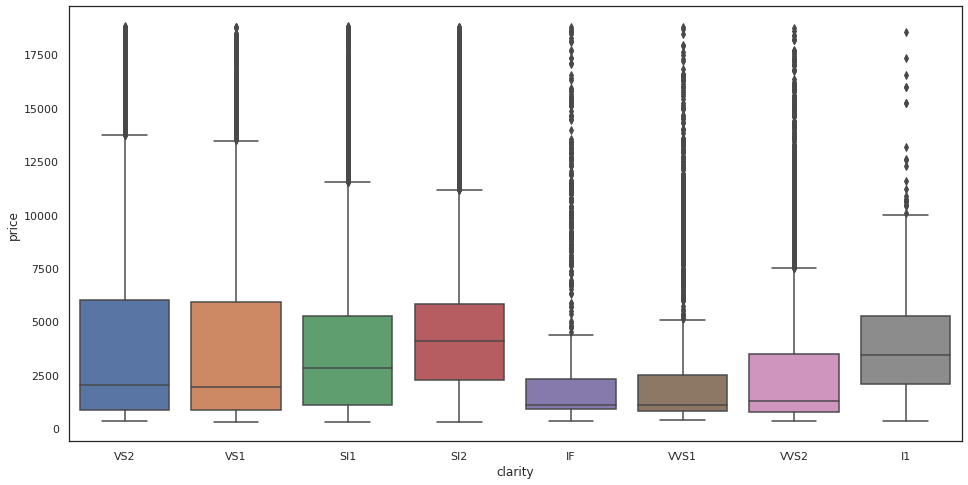

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))

ax = sns.boxplot(x='clarity', y='price', data=df)

Clarities VS1 and VS2 are affecting in the same way to the final price of diamonds.

## 6) Table, x, y, z

Table, x, y and z are dimensions of diamonds. As per correlation heat map, these variables will directly affect diamond's price.

<AxesSubplot:xlabel='table', ylabel='price'>

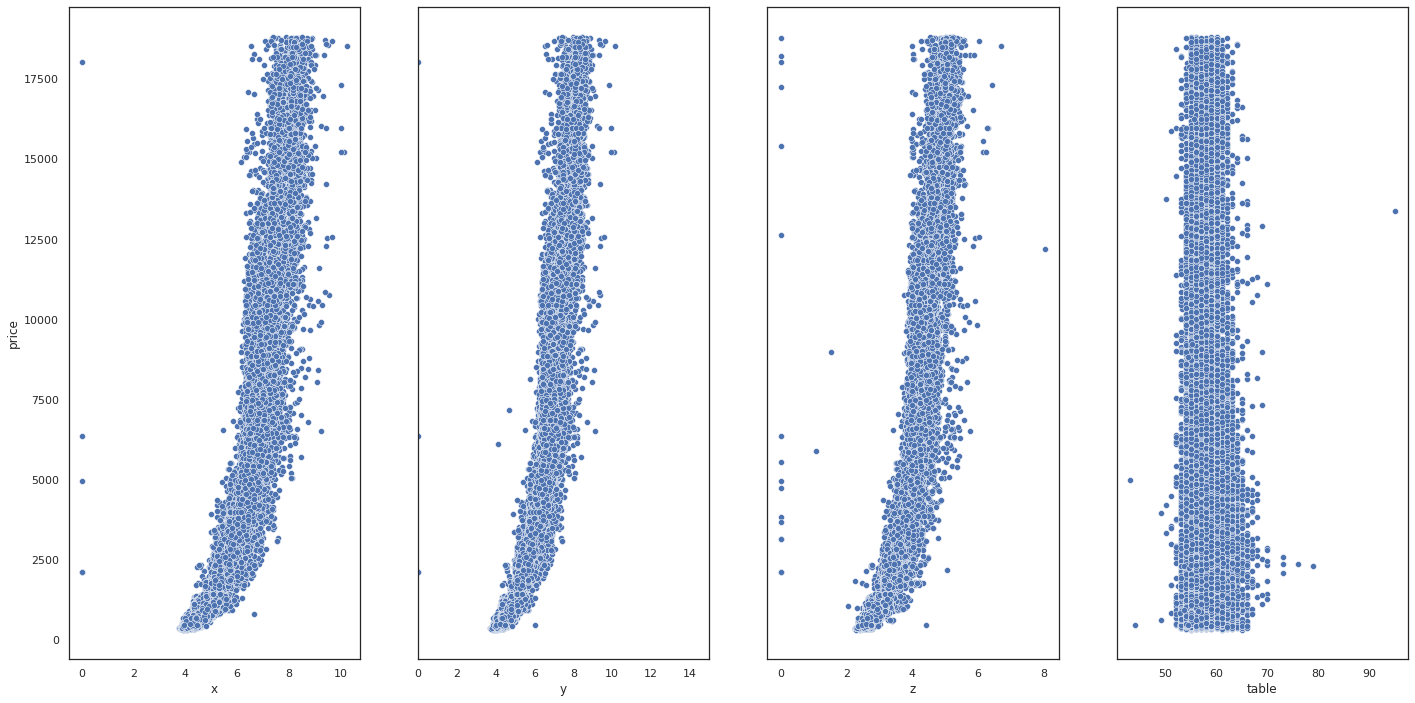

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=4, sharey=True, figsize=(24,12))
sns.scatterplot(ax=ax[0], x='x', y='price', data=df)
sns.scatterplot(ax=ax[1], x='y', y='price', data=df)
ax[1].set_xlim(0,15)
sns.scatterplot(ax=ax[2], x='z', y='price', data=df)
sns.scatterplot(ax=ax[3], x='table', y='price', data=df)

# Bonus Challenge: Hypothesis Testing

## Test 1 - one sample vs constant hypothesis test.

In [16]:
# First we need to import scipy library

from scipy.stats import ttest_1samp 

In [19]:
prices = df.price
test_results = ttest_1samp(prices, 4000)
display(test_results.statistic)
display(test_results.pvalue / 2)

-3.604902369125729

0.00015632266416537423

According to results above, where t(student) is < 0 and probability is < 0.05, mean prices of our samples will be quite different (because of the high t value) and **lower than literature value**.

## Test 2 - two independent samples.

In [21]:
# Import libraries

from scipy.stats import ttest_ind

In [37]:
# Sub-Test 1: Fair cut + color G vs. Fair cut + color I

# First of all we filter our dataset to obtain the two samples we want to compare

filter_a1 = df['cut'] == 'Fair'
filter_a2 = df['color'] == 'G'
filter_b1 = df['cut'] == 'Fair'
filter_b2 = df['color'] == 'I'

df_filtered_a = df[filter_a1 & filter_a2]
df_filtered_b = df[filter_b1 & filter_b2]

# Then we run the test

display(ttest_ind(df_filtered_a['price'], df_filtered_b['price'], equal_var=True))
display(ttest_ind(df_filtered_a['price'], df_filtered_b['price'], equal_var=False))

Ttest_indResult(statistic=0.03552493926641288, pvalue=0.971680163699314)

Ttest_indResult(statistic=0.03626636629279179, pvalue=0.9710929771417586)

In [29]:
# Sub-Test 2: Good cut + color E vs. Good cut + color F

# First of all we filter our dataset to obtain the two samples we want to compare

filter_a1 = df['cut'] == 'Good'
filter_a2 = df['color'] == 'E'
filter_b1 = df['cut'] == 'Good'
filter_b2 = df['color'] == 'F'

df_filtered_a = df[filter_a1 & filter_a2]
df_filtered_b = df[filter_b1 & filter_b2]

# Then we run the test

display(ttest_ind(df_filtered_a['price'], df_filtered_b['price'], equal_var=True))
display(ttest_ind(df_filtered_a['price'], df_filtered_b['price'], equal_var=False))

Ttest_indResult(statistic=-0.44021568469654665, pvalue=0.6598512677605672)

Ttest_indResult(statistic=-0.4406178833837438, pvalue=0.6595600994188809)

In [30]:
# Sub-Test 3: Ideal cut + color D vs. Ideal cut + color E

# First of all we filter our dataset to obtain the two samples we want to compare

filter_a1 = df['cut'] == 'Ideal'
filter_a2 = df['color'] == 'D'
filter_b1 = df['cut'] == 'Ideal'
filter_b2 = df['color'] == 'E'

df_filtered_a = df[filter_a1 & filter_a2]
df_filtered_b = df[filter_b1 & filter_b2]

# Then we run the test

display(ttest_ind(df_filtered_a['price'], df_filtered_b['price'], equal_var=True))
display(ttest_ind(df_filtered_a['price'], df_filtered_b['price'], equal_var=False))

Ttest_indResult(statistic=-0.5353150115731534, pvalue=0.5924555216763925)

Ttest_indResult(statistic=-0.5376051381964381, pvalue=0.590875060001048)

In [31]:
# Sub-Test 4: Premium cut + color D vs. Premium cut + color E

# First of all we filter our dataset to obtain the two samples we want to compare

filter_a1 = df['cut'] == 'Premium'
filter_a2 = df['color'] == 'D'
filter_b1 = df['cut'] == 'Premium'
filter_b2 = df['color'] == 'E'

df_filtered_a = df[filter_a1 & filter_a2]
df_filtered_b = df[filter_b1 & filter_b2]

# Then we run the test

display(ttest_ind(df_filtered_a['price'], df_filtered_b['price'], equal_var=True))
display(ttest_ind(df_filtered_a['price'], df_filtered_b['price'], equal_var=False))

Ttest_indResult(statistic=0.4218931206720332, pvalue=0.6731344334342131)

Ttest_indResult(statistic=0.4238712765446736, pvalue=0.6716959865958436)

In [28]:
# Sub-Test 5: Very Good cut + color I vs. Very Good cut + color J

# First of all we filter our dataset to obtain the two samples we want to compare

filter_a1 = df['cut'] == 'Fair'
filter_a2 = df['color'] == 'G'
filter_b1 = df['cut'] == 'Fair'
filter_b2 = df['color'] == 'I'

df_filtered_a = df[filter_a1 & filter_a2]
df_filtered_b = df[filter_b1 & filter_b2]

# Then we run the test

display(ttest_ind(df_filtered_a['price'], df_filtered_b['price'], equal_var=True))
display(ttest_ind(df_filtered_a['price'], df_filtered_b['price'], equal_var=False))

Ttest_indResult(statistic=0.03552493926641288, pvalue=0.971680163699314)

Ttest_indResult(statistic=0.03626636629279179, pvalue=0.9710929771417586)

In [32]:
# Sub-Test 6: All cuts + color D vs. All cuts + color E

# First of all we filter our dataset to obtain the two samples we want to compare

filter_a = df['color'] == 'D'
filter_b = df['color'] == 'E'

df_filtered_a = df[filter_a]
df_filtered_b = df[filter_b]

# Then we run the test

display(ttest_ind(df_filtered_a['price'], df_filtered_b['price'], equal_var=True))
display(ttest_ind(df_filtered_a['price'], df_filtered_b['price'], equal_var=False))

Ttest_indResult(statistic=0.7630611794666871, pvalue=0.44544145948793734)

Ttest_indResult(statistic=0.7646978610927021, pvalue=0.44446798501477136)

## Conclusion

What these results tell us (probability is larger than 0.05) is the null hypothesis is staisfied, that is, the mean of sample 'a' is not significantly different from the mean of sample 'b'.

Other conclusion would be that for the same type of cut, the color has no a very large inffluence over the final price.